In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
style.use('seaborn')
sns.set_context('notebook')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_data = pd.read_csv(url)
covid_data.shape

(254, 73)

In [3]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [4]:
covid_data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,...,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,21.975756,23.269772,2.185039,2.574803,3.704724,5.645669,8.338583,11.523622,21.960630,24.275591,...,1198.409449,1326.586614,1489.114173,1645.846457,1841.153543,2085.003937,2335.791339,2601.204724,2835.106299,3080.177165
std,24.514971,71.366231,27.914770,28.014259,34.873053,48.531971,67.819829,91.374428,224.276964,225.635096,...,6200.695287,6647.478967,7266.732336,7893.376557,8731.214121,9865.187373,11048.735473,12351.749968,13572.269068,14905.607637
min,-41.454500,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.094375,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,4.250000,6.000000,7.000000,8.250000,11.250000,12.000000,13.250000,15.250000,18.000000
50%,23.764900,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.000000,71.500000,75.000000,84.000000,93.000000,105.500000,108.500000,120.000000,138.500000,148.500000
75%,41.272800,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,300.750000,324.250000,363.500000,400.750000,452.750000,500.250000,572.750000,637.000000,673.250000,707.250000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67800.000000,67800.000000,67800.000000,69176.000000,74386.000000,83836.000000,101657.000000,121478.000000,140886.000000,161807.000000


In [5]:
covid_data.rename(columns={'Province/State': 'state', 'Country/Region': 'country', 
                            'Lat': 'lat', 'Long': 'long'}, inplace=True)
covid_data.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


# USA

In [6]:
usa = covid_data.loc[covid_data['country'] == 'US']
usa.drop(['state', 'country', 'lat', 'long'], axis=1, inplace=True)
usa

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
225,1,1,2,2,5,5,5,5,5,7,...,25489,33276,43847,53740,65778,83836,101657,121478,140886,161807


In [7]:
usa.values

array([[     1,      1,      2,      2,      5,      5,      5,      5,
             5,      7,      8,      8,     11,     11,     11,     11,
            11,     11,     11,     11,     12,     12,     13,     13,
            13,     13,     13,     13,     13,     13,     15,     15,
            15,     51,     51,     57,     58,     60,     68,     74,
            98,    118,    149,    217,    262,    402,    518,    583,
           959,   1281,   1663,   2179,   2727,   3499,   4632,   6421,
          7783,  13677,  19100,  25489,  33276,  43847,  53740,  65778,
         83836, 101657, 121478, 140886, 161807]])

In [8]:
us_counts = np.squeeze(usa.values)
us_counts

array([     1,      1,      2,      2,      5,      5,      5,      5,
            5,      7,      8,      8,     11,     11,     11,     11,
           11,     11,     11,     11,     12,     12,     13,     13,
           13,     13,     13,     13,     13,     13,     15,     15,
           15,     51,     51,     57,     58,     60,     68,     74,
           98,    118,    149,    217,    262,    402,    518,    583,
          959,   1281,   1663,   2179,   2727,   3499,   4632,   6421,
         7783,  13677,  19100,  25489,  33276,  43847,  53740,  65778,
        83836, 101657, 121478, 140886, 161807])

# South Korea

In [9]:
sk = covid_data.loc[covid_data['country'] == 'Korea, South']
sk.drop(['state', 'country', 'lat', 'long'], axis=1, inplace=True)
sk

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
143,1,1,2,2,3,4,4,4,4,11,...,8799,8961,8961,9037,9137,9241,9332,9478,9583,9661


In [10]:
sk.values

array([[   1,    1,    2,    2,    3,    4,    4,    4,    4,   11,   12,
          15,   15,   16,   19,   23,   24,   24,   25,   27,   28,   28,
          28,   28,   28,   29,   30,   31,   31,  104,  204,  433,  602,
         833,  977, 1261, 1766, 2337, 3150, 3736, 4335, 5186, 5621, 6088,
        6593, 7041, 7314, 7478, 7513, 7755, 7869, 7979, 8086, 8162, 8236,
        8320, 8413, 8565, 8652, 8799, 8961, 8961, 9037, 9137, 9241, 9332,
        9478, 9583, 9661]])

In [11]:
sk_counts = np.squeeze(sk.values)
sk_counts

array([   1,    1,    2,    2,    3,    4,    4,    4,    4,   11,   12,
         15,   15,   16,   19,   23,   24,   24,   25,   27,   28,   28,
         28,   28,   28,   29,   30,   31,   31,  104,  204,  433,  602,
        833,  977, 1261, 1766, 2337, 3150, 3736, 4335, 5186, 5621, 6088,
       6593, 7041, 7314, 7478, 7513, 7755, 7869, 7979, 8086, 8162, 8236,
       8320, 8413, 8565, 8652, 8799, 8961, 8961, 9037, 9137, 9241, 9332,
       9478, 9583, 9661])

# Italy

In [12]:
italy = covid_data.loc[covid_data['country'] == 'Italy']
italy.drop(['state', 'country', 'lat', 'long'], axis=1, inplace=True)
italy

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
137,0,0,0,0,0,0,0,0,0,2,...,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739


In [13]:
italy.values

array([[     0,      0,      0,      0,      0,      0,      0,      0,
             0,      2,      2,      2,      2,      2,      2,      2,
             3,      3,      3,      3,      3,      3,      3,      3,
             3,      3,      3,      3,      3,      3,     20,     62,
           155,    229,    322,    453,    655,    888,   1128,   1694,
          2036,   2502,   3089,   3858,   4636,   5883,   7375,   9172,
         10149,  12462,  12462,  17660,  21157,  24747,  27980,  31506,
         35713,  41035,  47021,  53578,  59138,  63927,  69176,  74386,
         80589,  86498,  92472,  97689, 101739]])

In [14]:
italy_counts = np.squeeze(italy.values)
italy_counts

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      2,      2,      2,      2,      2,      2,      2,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,     20,     62,
          155,    229,    322,    453,    655,    888,   1128,   1694,
         2036,   2502,   3089,   3858,   4636,   5883,   7375,   9172,
        10149,  12462,  12462,  17660,  21157,  24747,  27980,  31506,
        35713,  41035,  47021,  53578,  59138,  63927,  69176,  74386,
        80589,  86498,  92472,  97689, 101739])

# Plots

In [15]:
columns = usa.columns
x = np.arange(len(columns))
print(x.shape)
print(us_counts.shape)

(69,)
(69,)


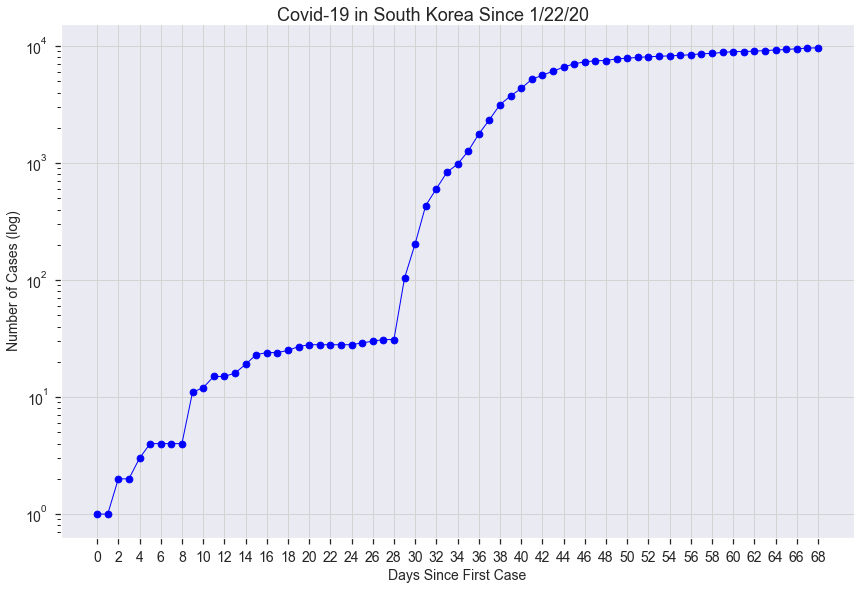

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, sk_counts, color='blue', s=45)
ax.plot(x, sk_counts, color='blue', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 2))
ax.set_yticks(np.arange(0, max(sk_counts), 1000))
ax.set_yscale(value='log')
plt.tight_layout()
fig.suptitle('Covid-19 in South Korea Since 1/22/20', fontsize=18, va='bottom')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

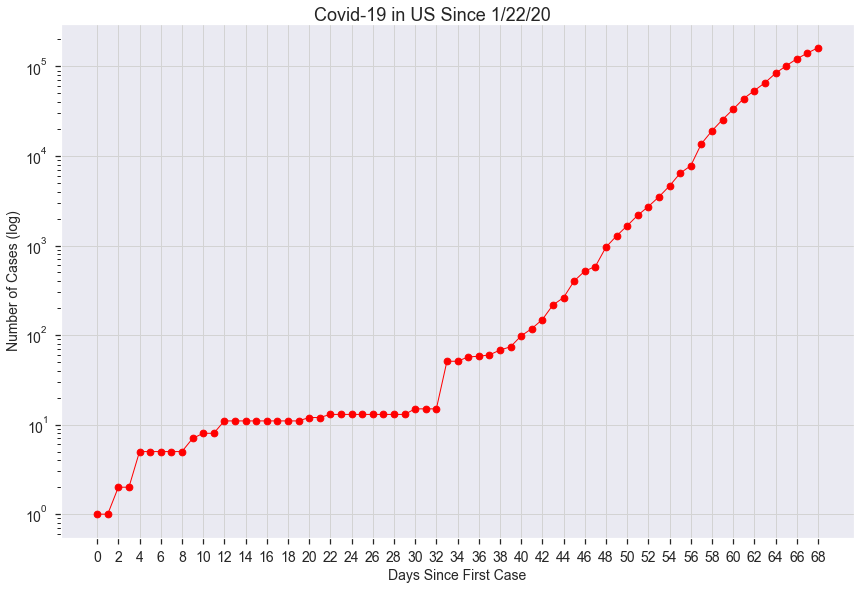

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, us_counts, color='red', s=45)
ax.plot(x, us_counts, color='red', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 2))
ax.set_yticks(np.arange(0, max(us_counts), 10000))
ax.set_yscale(value='log')
fig.suptitle('Covid-19 in US Since 1/22/20', fontsize=18, va='bottom')
plt.tight_layout()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

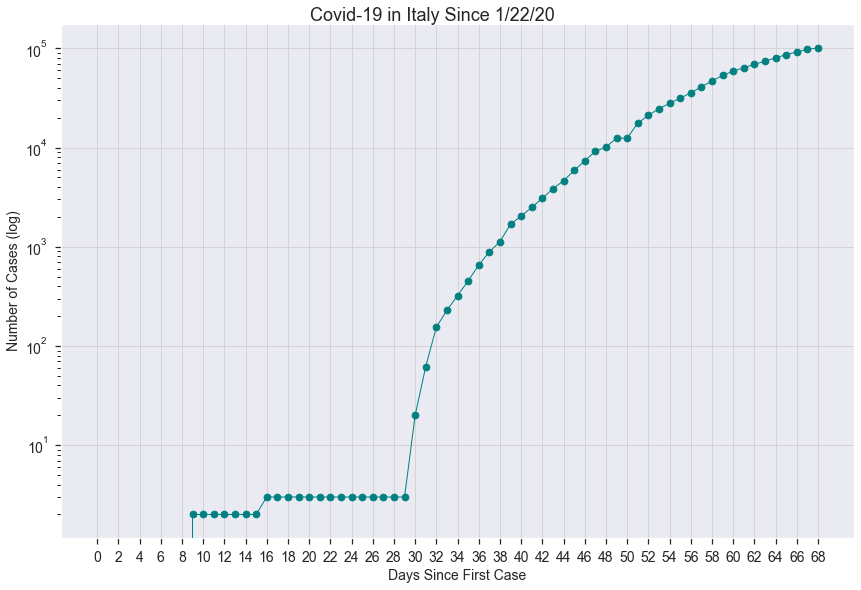

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, italy_counts, color='teal', s=45)
ax.plot(x, italy_counts, color='teal', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 2))
ax.set_yticks(np.arange(min(italy_counts), max(italy_counts), 10000))
ax.set_yscale(value='log')
plt.tight_layout()
fig.suptitle('Covid-19 in Italy Since 1/22/20', fontsize=18, va='bottom')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

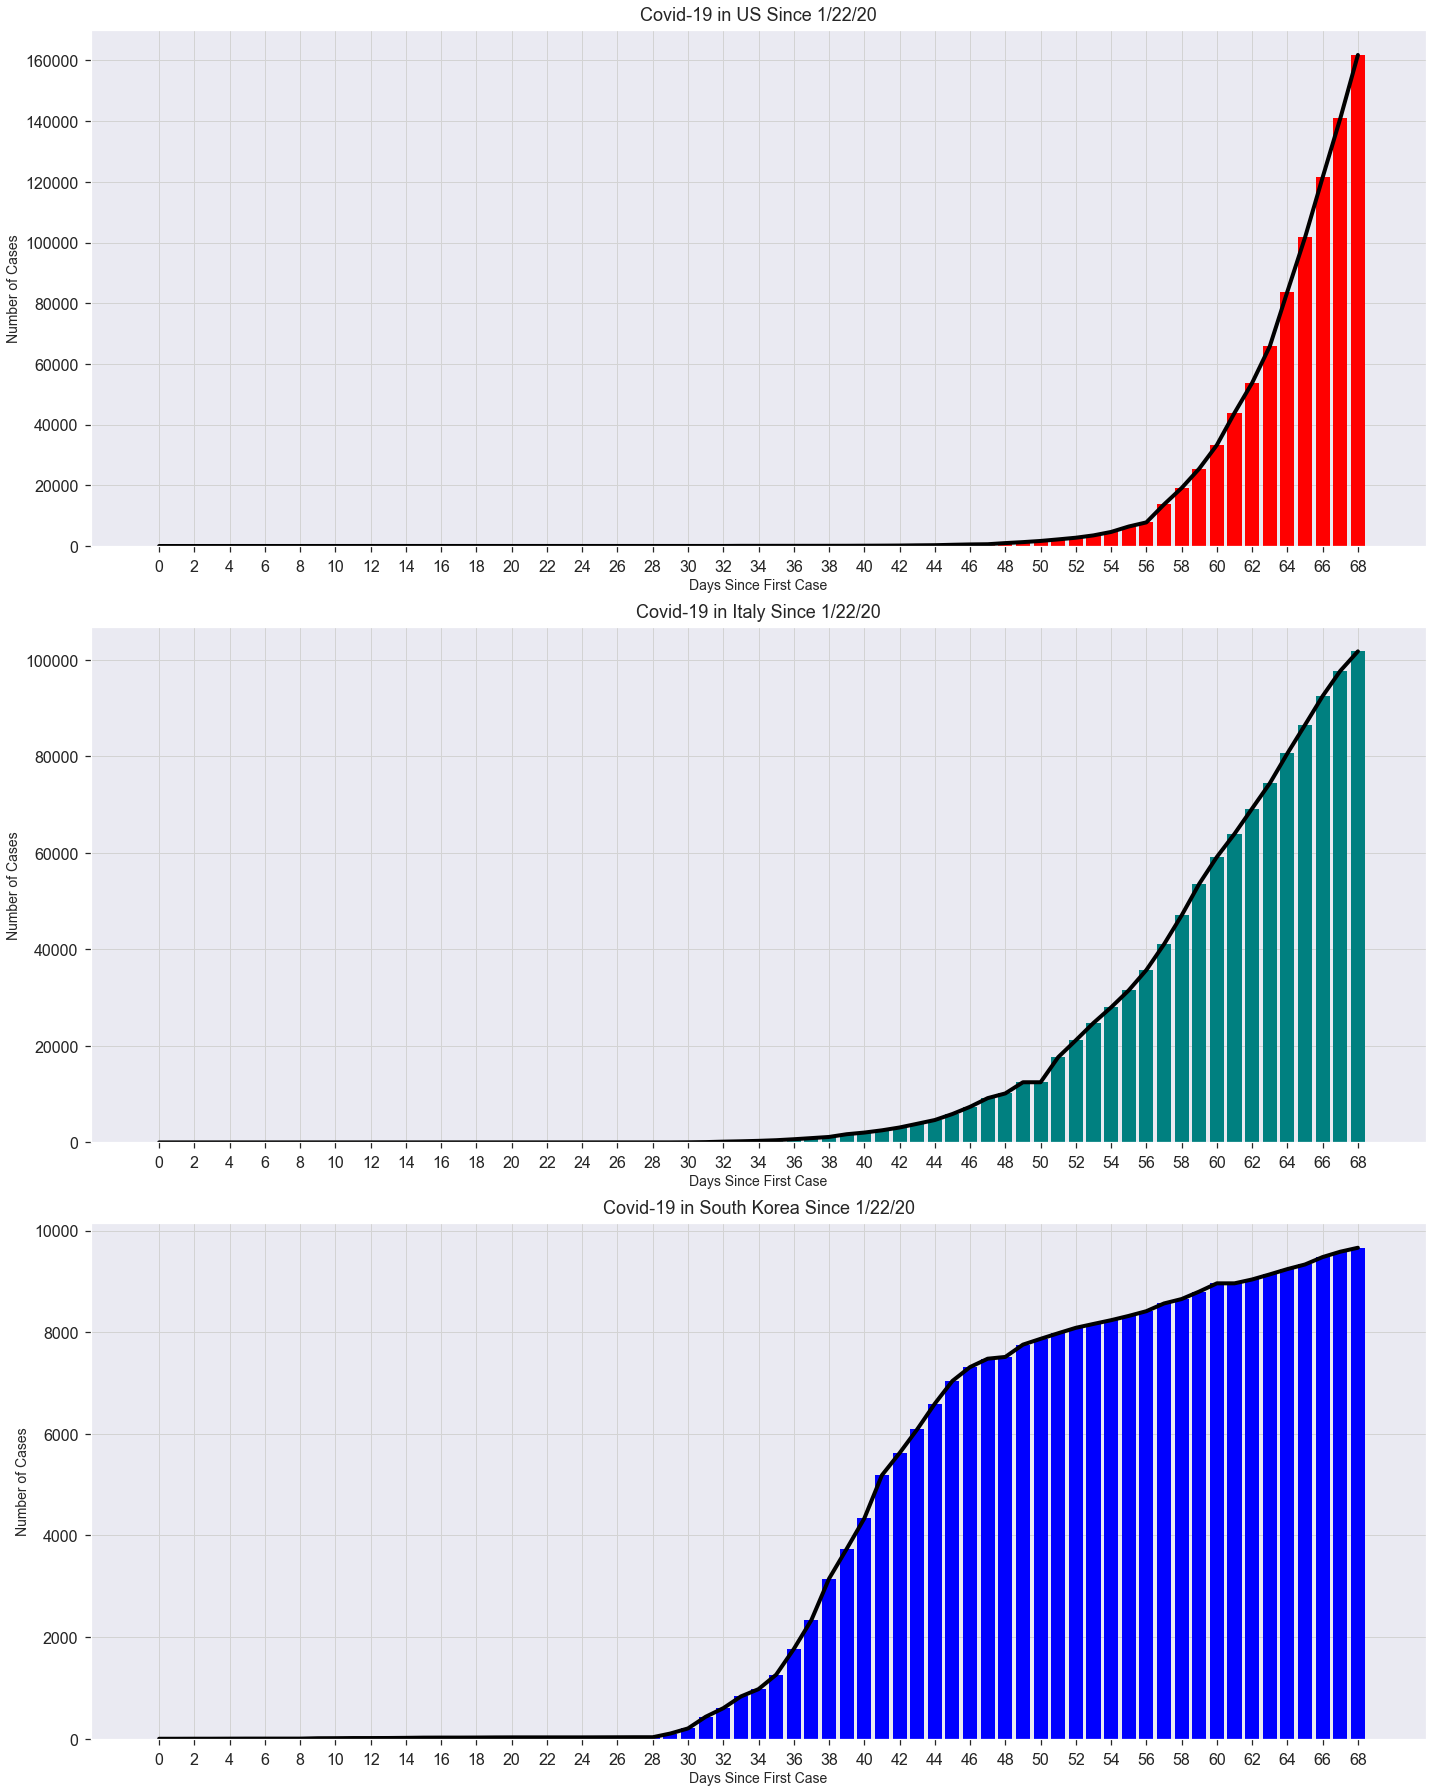

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,25))
axes = [ax1, ax2, ax3]
ax1.plot(x, us_counts, color='black', linewidth=4)
ax2.plot(x, italy_counts, color='black', linewidth=4)
ax3.plot(x, sk_counts, color='black', linewidth=4)
ax1.bar(x, us_counts, color='red')
ax2.bar(x, italy_counts, color='teal')
ax3.bar(x, sk_counts, color='blue')
for ax in axes:
    ax.set_xlabel('Days Since First Case', fontsize=14)
    ax.set_ylabel('Number of Cases', fontsize=14)
    ax.set_xticks(np.arange(min(x), max(x)+1, 2))
    ax.grid(c='lightgrey')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
ax1.set_title('Covid-19 in US Since 1/22/20', fontsize=18, va='bottom')
ax2.set_title('Covid-19 in Italy Since 1/22/20', fontsize=18, va='bottom')
ax3.set_title('Covid-19 in South Korea Since 1/22/20', fontsize=18, va='bottom')
plt.tight_layout()
plt.show()